# Выделение групп пользователей на основе поведения

Дерзкая и амбициозная команда сервиса «Ненужные вещи» считает, что пользователи совершают много действий в приложении. Нужно найти в данных инсайты, которые позволят Ненужным вещам стать лучшим приложением для продажи ненужных вещей.

**Задача проекта:**

Выявить целевой и смежные сегменты аудитории мобильного приложения и предложить рекомендации по улучшению взаимодействия со смежными сегментами

# Описание данных

Датасет **mobile_dataset.csv** содержит колонки:
- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Расшифровки событий:
- `advert_open` — открытие карточки объявления
-`photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

<h1>Оглавление aka план проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изучу-основную-информацию-по-таблице-event_data:" data-toc-modified-id="Изучу-основную-информацию-по-таблице-event_data:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучу основную информацию по таблице event_data:</a></span></li><li><span><a href="#Изучу-основную-информацию-по-таблице-source_data:" data-toc-modified-id="Изучу-основную-информацию-по-таблице-source_data:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучу основную информацию по таблице source_data:</a></span></li><li><span><a href="#Вывод-по-шагу-1" data-toc-modified-id="Вывод-по-шагу-1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по шагу 1</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Смотрю,-сколько-клиентов-из-каких-источников-пришли" data-toc-modified-id="Смотрю,-сколько-клиентов-из-каких-источников-пришли-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Смотрю, сколько клиентов из каких источников пришли</a></span></li><li><span><a href="#Распределение-событий-по-дням" data-toc-modified-id="Распределение-событий-по-дням-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение событий по дням</a></span></li><li><span><a href="#Разделяю-события-на-сессии" data-toc-modified-id="Разделяю-события-на-сессии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разделяю события на сессии</a></span></li><li><span><a href="#Поиск-фродера" data-toc-modified-id="Поиск-фродера-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск фродера</a></span></li><li><span><a href="#Считаю-lifetime" data-toc-modified-id="Считаю-lifetime-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Считаю lifetime</a></span></li><li><span><a href="#Считаю-число-целевых-действий" data-toc-modified-id="Считаю-число-целевых-действий-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Считаю число целевых действий</a></span></li><li><span><a href="#Считаю-распределение-признаков" data-toc-modified-id="Считаю-распределение-признаков-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Считаю распределение признаков</a></span></li><li><span><a href="#Матрица-коррелиции-признаков" data-toc-modified-id="Матрица-коррелиции-признаков-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Матрица коррелиции признаков</a></span></li><li><span><a href="#Вывод-по-шагу-2" data-toc-modified-id="Вывод-по-шагу-2-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Вывод по шагу 2</a></span></li></ul></li><li><span><a href="#Сегментировать-пользователей-на-основе-действий" data-toc-modified-id="Сегментировать-пользователей-на-основе-действий-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментировать пользователей на основе действий</a></span><ul class="toc-item"><li><span><a href="#Сегментация" data-toc-modified-id="Сегментация-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сегментация</a></span></li><li><span><a href="#Описание-сегментов" data-toc-modified-id="Описание-сегментов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Описание сегментов</a></span></li><li><span><a href="#Вывод-по-шагу-3" data-toc-modified-id="Вывод-по-шагу-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод по шагу 3</a></span></li></ul></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистический анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-Retention-rate" data-toc-modified-id="Анализ-Retention-rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ Retention rate</a></span></li><li><span><a href="#Вывод-по-шагу-4" data-toc-modified-id="Вывод-по-шагу-4-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод по шагу 4</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-первой-гипотезы" data-toc-modified-id="Проверка-первой-гипотезы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка первой гипотезы</a></span></li><li><span><a href="#Проверка-второй-гипотезы" data-toc-modified-id="Проверка-второй-гипотезы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка второй гипотезы</a></span></li><li><span><a href="#Вывод-по-шагу-5" data-toc-modified-id="Вывод-по-шагу-5-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод по шагу 5</a></span></li></ul></li><li><span><a href="#Выводы-по-анализу" data-toc-modified-id="Выводы-по-анализу-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы по анализу</a></span></li><li><span><a href="#Предложения" data-toc-modified-id="Предложения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Предложения</a></span></li><li><span><a href="#Материалы" data-toc-modified-id="Материалы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Материалы</a></span></li></ul></div>

## Предобработка данных 

In [1]:
#импортирую панд и другие библиотеки
import pandas as pd 
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import math as mth
from plotly import graph_objects as go
from datetime import datetime
from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(style="white")
colors =["#ff6b85","#ffcf57","#0059d7","#af4fcb","#3d35e7"]
sns.set_palette(sns.color_palette(colors))

In [2]:
#загружаю датасеты
event_data = pd.read_csv('/datasets/mobile_dataset.csv')
source_data = pd.read_csv('/datasets/mobile_soures.csv')

### Изучу основную информацию по таблице event_data:

In [3]:
event_data.head(5)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
event.time    74197 non-null object
event.name    74197 non-null object
user.id       74197 non-null object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
event_data.describe()

,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-19 05:31:19.808163,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


Переименую стоблцы для упрощения работы:

In [6]:
event_data = event_data.rename({'user.id':'id', 'event.time':'time', 'event.name':'event'}, axis=1)

Проверяю на дубли:

In [7]:
event_data.duplicated().sum()

0

Привожу столбец времени к нужному типу:

In [8]:
event_data['time'] = pd.to_datetime(event_data['time'])

Смотрю, за какой период есть данные:

In [9]:
print('Минимальное время события', event_data['time'].min())
print('Максимальное время события', event_data['time'].max())

Минимальное время события 2019-10-07 00:00:00.431357
Максимальное время события 2019-11-03 23:58:12.532487


Добавлю столбцы с часом, днём, неделей и полной датой события:

In [10]:
event_data['hour'] = event_data['time'].dt.hour 
event_data['day'] = event_data['time'].dt.weekday
event_data['week'] = event_data['time'].astype('datetime64[W]') 
event_data['date'] = event_data['time'].astype('datetime64[D]') 

Заменяю значения show_contacts на contacts_show, так как они означают одно и тоже

In [11]:
event_data.loc[(event_data['event'] == "show_contacts"), 'event'] = "contacts_show"

Имеем датафрейм event_data на 74197 строк, содержащий информацию о ID пользователя, названии и времени события. 

Пропущенных значений нет, дубликатов нет. Столбец с временем события привёл к нужному типу.

Видим, что данные представлены почти за месяц: с 7 октября по третье ноября. 

### Изучу основную информацию по таблице source_data:

In [12]:
source_data.head(5)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [13]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
userId    4293 non-null object
source    4293 non-null object
dtypes: object(2)
memory usage: 67.2+ KB


In [14]:
source_data.describe()

,userId,source
count,4293,4293
unique,4293,3
top,8fde8f3d-b39b-4d5e-9180-b193f295cb03,yandex
freq,1,1934


Переименовываю столбец userId, чтобы все символы были строчными, а работать с таблицей было удобнее:

In [15]:
source_data = source_data.rename({'userId':'id'}, axis=1)

Смотрю число дублей:

In [16]:
source_data.duplicated().sum()

0

### Вывод по шагу 1

В датафрейме source_data 4293 строки, что равняется числу уникальных ID пользователей из таблицы event_data. Содержит информацию об ID пользователя и источнике, из которого он был привлёчен. 

Пропусков нет, дубликатов нет в обоих таблицах. 

Для таблицы с событиями изменил тип данных стобца даты и времени, посчитал отдельно день недели, неделю и дату события для дальнейшего анализа.

## Исследовательский анализ данных

### Смотрю, сколько клиентов из каких источников пришли

In [17]:
source_data['id'].groupby([source_data['source']]).count()

source
google    1129
other     1230
yandex    1934
Name: id, dtype: int64

Смотрю, какое число раз действия совершались пользователями: 

In [18]:
event_data['event'].groupby([event_data['event']]).count().sort_values(ascending=False)

event
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event, dtype: int64

In [19]:
#добавляю данные ою источниках в таблицу с событиями
event_data = event_data.merge(source_data, on = 'id')

In [20]:
#избавляюсь от алёрта в графике
import warnings
warnings.filterwarnings('ignore')

### Распределение событий по дням

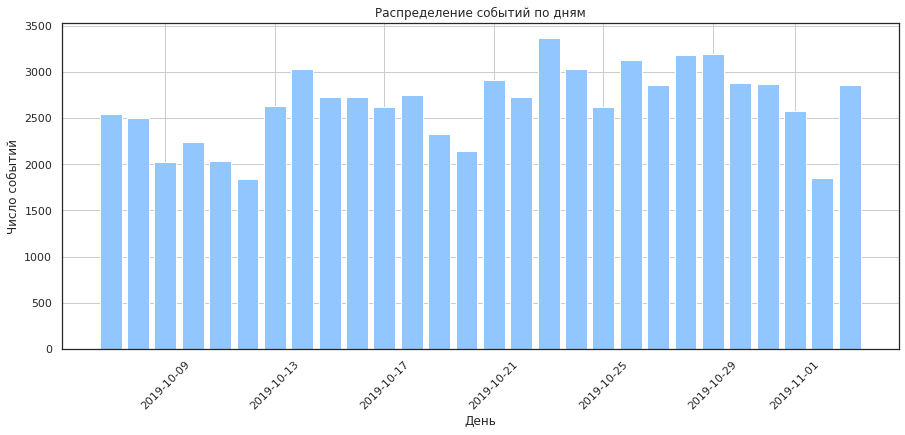

In [21]:
#строю график распределения событий по дням

events_by_day = event_data.groupby('date', as_index=False).agg({'id':'count'})

plt.figure(figsize=(15,6))
with plt.style.context('seaborn-pastel'):
    plt.bar(events_by_day['date'], events_by_day['id'])
plt.xlabel('День')
plt.ylabel('Число событий')
plt.title('Распределение событий по дням')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

Сильных выбросов по дням не заметно. Самый активный день -- 23 октября, а самый спокойный -- выходные 12 октбяря и 2 ноября. 

In [22]:
#Посмотрю, как распределение ведёт себя в зависимости от источника:

yandex_data = event_data.query('source == "yandex"')
google_data = event_data.query('source == "google"')
other_data = event_data.query('source == "other"')

yandex_by_day = yandex_data.groupby('date', as_index=False).agg({'id':'count'})
google_by_day = google_data.groupby('date', as_index=False).agg({'id':'count'})
other_by_day = other_data.groupby('date', as_index=False).agg({'id':'count'})

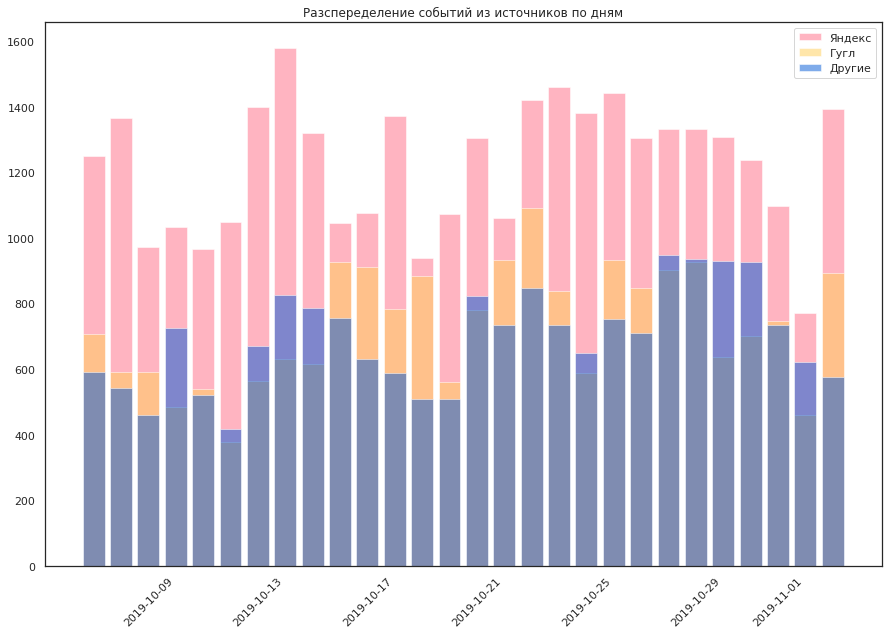

In [23]:
#Строю график распределения событий по дням в зависимости от источника

plt.figure(figsize=(15,10)) 
plt.title('Разспеределение событий из источников по дням')
plt.bar(yandex_by_day['date'], yandex_by_day['id'], alpha=.5)
plt.bar(google_by_day['date'], google_by_day['id'], alpha=.5)
plt.bar(other_by_day['date'], other_by_day['id'], alpha=.5)
plt.legend(['Яндекс', 'Гугл', 'Другие'])
plt.xticks(rotation=45)
plt.show()

Видим довольно ровное поведение пользователей, без явных аномалий. 
Больше всего действий стабильно приходится на Яндекс. 

### Разделяю события на сессии

Найду данные по клиентским сессиям. Посчитаю, что если действия совершались в течение одного часа -- они относятся к одной сессии: 

In [24]:
#сначала нахожу время начала и конца сессии в пределах часа:

session_time_min = event_data.groupby(['id', 'date', 'hour'], as_index=False).agg({'time':'min'})
session_time_max = event_data.groupby(['id', 'date', 'hour'], as_index=False).agg({'time':'max'})

session_time_min = session_time_min.rename(columns={'time':'session_start'})
session_time_max = session_time_max.rename(columns={'time':'session_stop'})

In [25]:
#затем считаю продолжительность и число сессий:

session_info =  pd.merge(session_time_min, session_time_max, on=['id', 'date', 'hour'])

session_info['duration'] = session_info['session_stop'] - session_info['session_start']

print('Всего получили', len(session_info), 'сессий')

Всего получили 12432 сессий


In [26]:
#Считаю суммарное время, проведённое пользователем в приложении: 

session_info['duration'] = session_info['duration'].astype('timedelta64[s]') / 60

Собираю информацию по клиентским сессиям в одну таблицу: 

In [27]:
#Создаю новый датафрейм
user_info = pd.DataFrame()
user_info['id'] = event_data['id'].unique()

#Считаю число сессий на клиента:
sessions_per_user = session_info.groupby('id', as_index=False).agg({'duration':'count'})
sessions_per_user = sessions_per_user.rename(columns={'duration':'count_of_sessions'})

#Считаю продолжительность сессий на клиента:
#duration_per_user = session_info.groupby('id', as_index=False).agg({'duration':'sum'})
#duration_per_user = duration_per_user.rename(columns={'duration':'duration_sum'})

In [28]:
#Обогощаю таблицу:

user_info = user_info.merge(sessions_per_user, on='id')
#user_info = user_info.merge(duration_per_user, on='id')
user_info = user_info.merge(source_data, on='id')

In [29]:
count_of_events = event_data.groupby(['id'], as_index=False).agg({'event':'count'})
count_of_events = count_of_events.rename(columns={'event':'event_count'})

In [30]:
count_of_events['event_count'].sum()

74197

In [31]:
user_info = user_info.merge(count_of_events, on='id', how='left')

In [32]:
user_info.head(5)

,id,count_of_sessions,source,event_count
0,020292ab-89bc-4156-9acf-68bc2783f894,1,other,28
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,10,yandex,93
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,5,yandex,96
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,3,other,8
4,f32e1e2a-3027-4693-b793-b7b3ff274439,1,google,33


In [33]:
user_info['event_count'].sum()

74197

Визуализирую, как много сессий совершают пользователи:

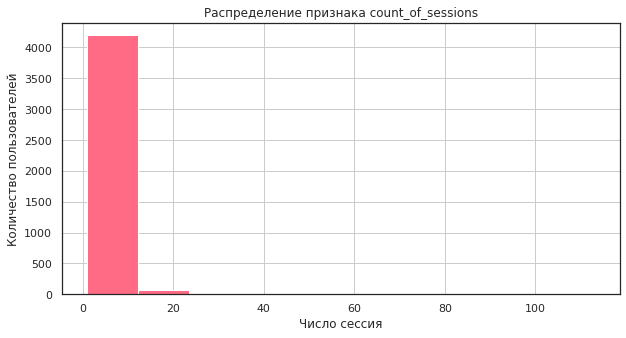

In [34]:
plt.figure(figsize=(10,5))
user_info['count_of_sessions'].hist(bins=10)
plt.title('Распределение признака count_of_sessions')
plt.xlabel('Число сессия')
plt.ylabel('Количество пользователей')
plt.show();

Судя по графику, есть небольшая доля пользователей, совершающих больше 100 сессий. Проверим: 

In [35]:
user_info['count_of_sessions'].value_counts()

1      1682
2      1226
3       488
4       311
5       178
6        96
7        80
8        35
9        34
10       24
11       23
12       15
14       12
13       12
15       10
16        9
19        8
17        5
24        5
18        4
20        3
21        3
25        3
29        2
30        2
33        2
37        2
32        2
31        2
36        1
76        1
28        1
40        1
55        1
47        1
53        1
113       1
22        1
26        1
54        1
23        1
27        1
35        1
41        1
Name: count_of_sessions, dtype: int64

Видим, что есть всего один клиент, совершивший 113 сессий за анализируемый период. Может быть, это наш тестировщик или разработчик?

### Поиск фродера

In [36]:
#Ищу пользователя по id
user_info['id'].loc[user_info['count_of_sessions'] == 113]

605    21230dd9-2f7f-4b77-a436-43d4d10388e0
Name: id, dtype: object

In [37]:
who_is_it = event_data.query('id == "21230dd9-2f7f-4b77-a436-43d4d10388e0"')
who_is_it['event'].count()

400

Видим, что за месяц наш активист совершил аж 400 действий, посмотрим точнее, что он делал: 

In [38]:
#смотрю, какие именно действия он совершает:
who_is_it['event'].value_counts()

tips_show        346
contacts_show     43
map                9
tips_click         1
favorites_add      1
Name: event, dtype: int64

А вот и ответ! Это бот, который отсматривает рекламу и ворует бюджеты у наших b2b клиентов. Из анализа его удаляем, а в СБ отправляем id для парманентного бана.

In [39]:
user_info = user_info.query('count_of_sessions < 100')

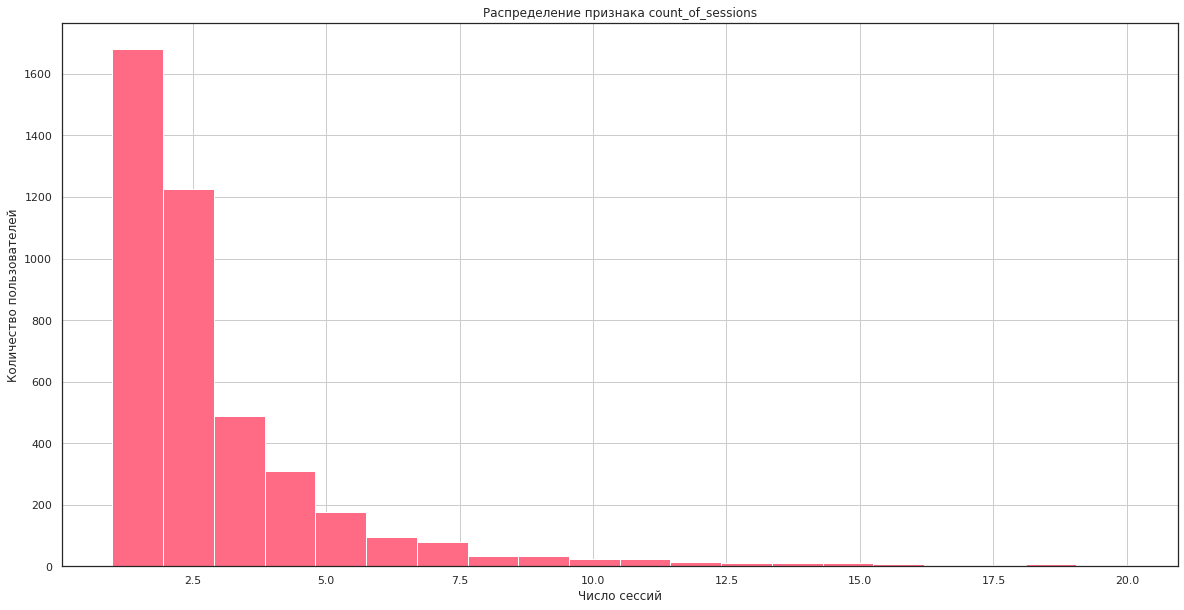

In [40]:
#строю укрупнённый график распределения числа сессий

plt.figure(figsize=(20,10))
user_info['count_of_sessions'].hist(bins=20, range =(1, 20))
plt.title('Распределение признака count_of_sessions')
plt.xlabel('Число сессий')
plt.ylabel('Количество пользователей')
plt.show();

Хоть мы и поймали злоумышленника, но в целом картина не сильно изменилась. Всё ещё есть пользователи с числом сессий около 50. Посчитаем, что это очень лояльные пользователи.

### Считаю lifetime

Посчитаем, как долго пользователь пользуется приложением: 

In [41]:
#Считаю время, когда пользователь зашел в приложение в первый раз, и когда в последний:
start_time = event_data.groupby(['id'], as_index=False).agg({'time':'min'})
start_time = start_time.rename(columns={'time':'start_at'})

stop_time = event_data.groupby(['id'], as_index=False).agg({'time':'max'})
stop_time = stop_time.rename(columns={'time':'stop_at'})

In [42]:
#Добавляю столбцы с датами в таблицу:
user_info = user_info.merge(start_time, on='id')
user_info = user_info.merge(stop_time, on='id')

#Считаю лайфтайм клиента
user_info['lifetime'] = user_info['stop_at'] - user_info['start_at']
user_info = user_info.drop(['stop_at', 'start_at'], axis=1)

#Перевожу лайфтайм в минуты
user_info['lifetime'] = user_info['lifetime'].astype('timedelta64[s]') / 60 

In [43]:
user_info['lifetime'].mean()

3787.1623019571293

### Считаю число целевых действий

Посчитаем для каждого пользователя число раз, когда тот совершил целевое действие -- просмотр контактов:

In [44]:
open_contact = event_data.query('event == "contacts_show"').groupby('id', as_index=False).agg({'event':'count'})
open_contact = open_contact.rename(columns={'event':'open_contact'})
open_contact

,id,open_contact
0,00157779-810c-4498-9e05-a1e9e3cedf93,11
1,00551e79-152e-4441-9cf7-565d7eb04090,3
2,005fbea5-2678-406f-88a6-fbe9787e2268,3
3,00753c79-ea81-4456-acd0-a47a23ca2fb9,1
4,007d031d-5018-4e02-b7ee-72a30609173f,2
...,...,...
976,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,17
977,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,1
978,ffc01466-fdb1-4460-ae94-e800f52eb136,1
979,ffe68f10-e48e-470e-be9b-eeb93128ff1a,1


Получили, что целевое действие совершил 981 пользователь. 

Добавлю данные в общую таблицу:

In [45]:
#Добавляю информацию о числе целевых действий на клиента в табилцу

user_info = user_info.merge(open_contact, on='id', how='left')
user_info['open_contact'] = user_info['open_contact'].fillna(0)

На мой взгляд, факта совершения целевого действия (просмотр контактов) недостаточно для анализа вовлеченности юзера. 
Посчитаю, что если пользователь добавил объевление в избранное и позвонил по номеру телефона -- это точно наш клиент: 

In [46]:
#Ищу, сколько раз каждый клиент позвонил из приложения и добавил карточку в избранное:

contacts_call = event_data.query('event=="contacts_call"').groupby('id', as_index=False).agg({'event':'count'})
favorites_add = event_data.query('event=="favorites_add"').groupby('id', as_index=False).agg({'event':'count'})

In [47]:
#Переименовываю стобцы 
contacts_call.columns = ['id', 'calls']
favorites_add.columns = ['id', 'add_to_favorites']


#Добавляю информацию о действиях в таблицу
user_info = user_info.merge(contacts_call, on='id', how='left')
user_info = user_info.merge(favorites_add, on='id', how='left')


#Заполняю пропуски нулями
user_info['calls'] = user_info['calls'].fillna(0)
user_info['add_to_favorites'] = user_info['add_to_favorites'].fillna(0)

In [48]:
# то же самое для кликов по рекомендованным объявлениям:

recomended_click = event_data.query('event=="tips_click"').groupby('id', as_index=False).agg({'event':'count'})
recomended_click.columns = ['id', 'clicks']
user_info = user_info.merge(recomended_click, on='id', how='left')
user_info['clicks'] = user_info['clicks'].fillna(0)

In [49]:
user_info.head()

,id,count_of_sessions,source,event_count,lifetime,open_contact,calls,add_to_favorites,clicks
0,020292ab-89bc-4156-9acf-68bc2783f894,1,other,28,18.700000,0.0,0.0,0.0,0.0
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,10,yandex,93,34539.350000,0.0,0.0,0.0,2.0
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,5,yandex,96,33101.716667,2.0,0.0,0.0,3.0
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,3,other,8,27997.600000,0.0,0.0,0.0,0.0
4,f32e1e2a-3027-4693-b793-b7b3ff274439,1,google,33,40.800000,0.0,0.0,0.0,0.0


Получил датафрейм с числом сессий, их суммарной продолжительностью, источником, из которого пришёл пользователь, lifetime пользователя, числом раз совершения целевого действия (просмотра контактов), числом звонков из приложения, кликам по рекомендованным объявлениям и добавлениям карточки в избранное. 

### Считаю распределение признаков

Проверю, как выглядит распределение этих признаков: 

In [50]:
#Почитанные ранее метрики привожу к необходимым для правильной работы методов типам:

#user_info['duration_sum'] = user_info['duration_sum'].astype('int') 
user_info['open_contact'] = user_info['open_contact'].astype('int') 
user_info['lifetime'] = user_info['lifetime'].astype('int') 
user_info['calls'] = user_info['calls'].astype('int') 
user_info['add_to_favorites'] = user_info['add_to_favorites'].astype('int') 
user_info['clicks'] = user_info['clicks'].astype('int') 
user_info['event_count'] = user_info['event_count'].astype('int') 

In [51]:
#Считаю перцентели по признакам:

for i in {'count_of_sessions', 'lifetime', 'open_contact', 'calls', 'add_to_favorites', 'clicks', 'event_count'}:
    print(i)
    print(np.percentile(user_info[i], [90, 95, 99])) # выведем перцентилиa

add_to_favorites
[0. 1. 9.]
open_contact
[ 2.  5. 15.]
clicks
[0. 1. 4.]
count_of_sessions
[ 5.  8. 19.]
lifetime
[14110.2  21809.65 33086.44]
calls
[0. 0. 3.]
event_count
[ 36.    58.45 129.27]


Получаем, что 90% пользователей укладываются в 5 сессий, 2 просмотра контакта, час продолжительности сессии, 14 тысяч минут лайфтайма (235 часов, почти 10 дней), совсем не звонят и не добавляют объявления в избранное. 

В свою очередь, только 1%  пользуется приложением больше 4 часов, открывает контакты больше 15 раз, совершает 19 и более сессий, а также имеет лайфтайм более 22 дней, звонят 3 раза и 9 раз добавляют объявление в избранное. 

### Матрица коррелиции признаков

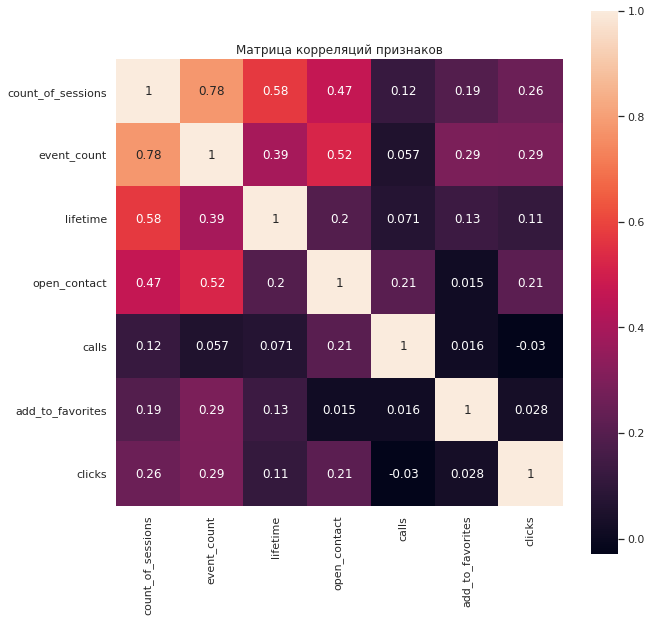

In [52]:
#строю матрицу корреляций
corr_info = user_info.drop(columns=['source'])

corr_m = corr_info.corr()
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Матрица корреляций признаков')
sns.heatmap(corr_m, square = True, annot = True)

Получаем, что сильная прямая зависимость есть только между числом визитов и суммой их продолжительности

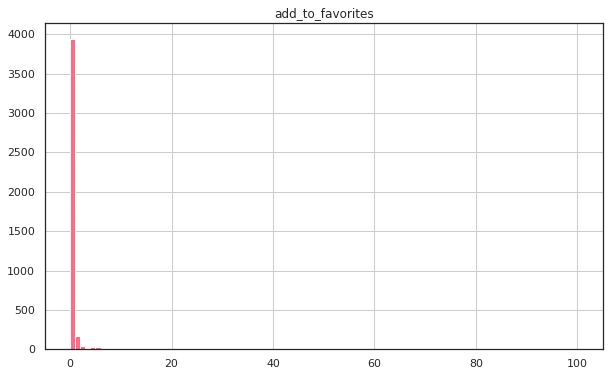

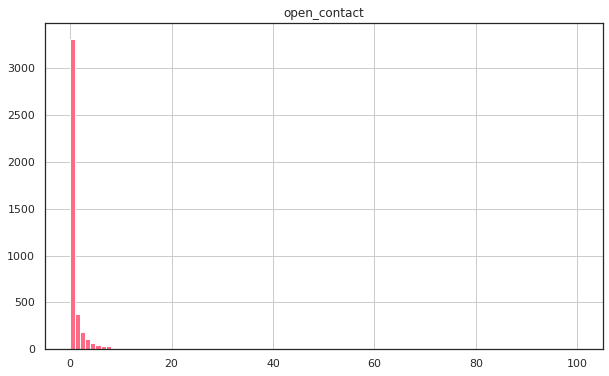

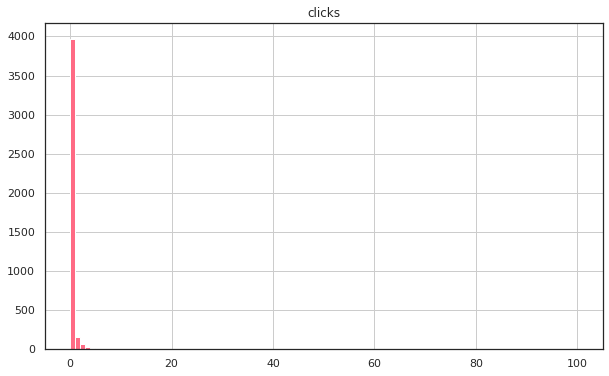

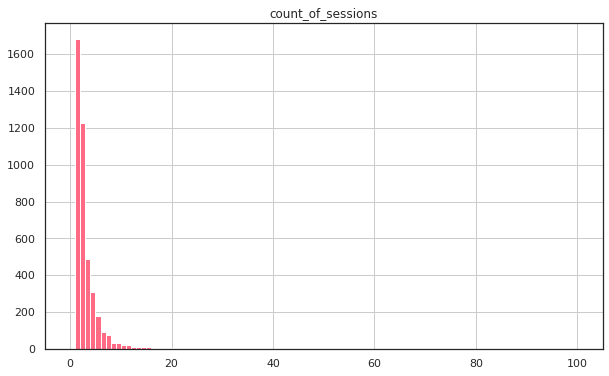

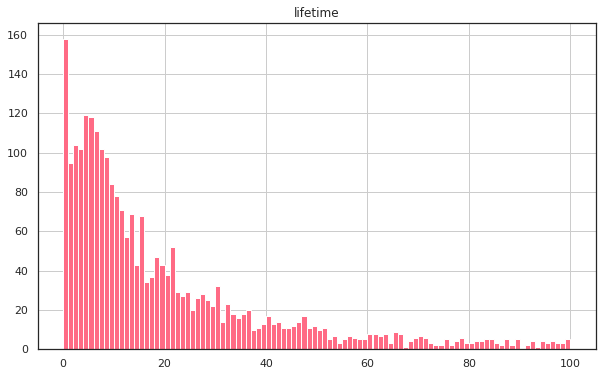

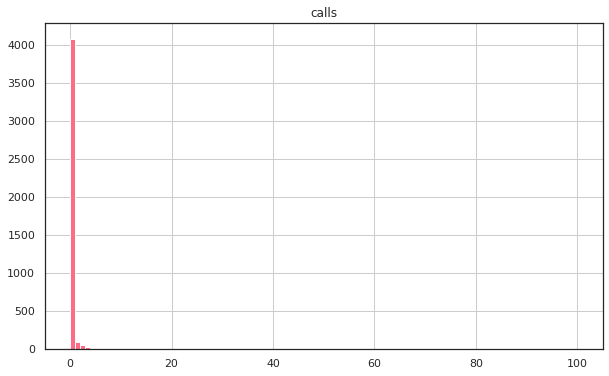

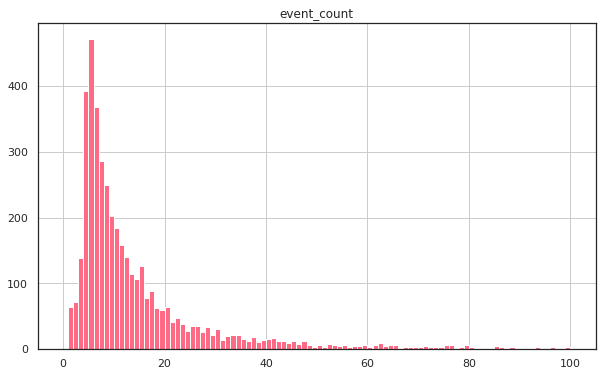

In [53]:
#Строю графики распределения по признакам: 

for i in {'count_of_sessions', 'lifetime', 'open_contact', 'calls', 'add_to_favorites', 'clicks', 'event_count'}:
    plt.figure(figsize=(10,6))
    plt.title(i)
    plt.hist(user_info[i], bins=100, range=(0,100))
    plt.grid(True);

In [54]:
print('Число пользователей, которые провели в приложении меньше 5 минут:', len(user_info.query('lifetime < 5')))

Число пользователей, которые провели в приложении меньше 5 минут: 578


Глядя на графики можно предположить, что в данных по-прежнему остались выбросы. Однако нет оснований полагать, что это не тот самый 1% крайне лояльных пользователей. От бота-фродера я избавился, так что оставлю оставшиеся данные как есть.

Более 1600 пользователей ограничиваются одной сессией. При этом 578 из них проводят в приложении меньше 5 минут. Этому могут быть причиной проблемы с оптимизацией для разных устройств. 

В большинстве случаев пользователи совершают до 5 сессий. 

Подавляющее большинство пользователей не доходят до целевого действия -- просмотра контактов. Это событие совершило около 400 пользователей. 

### Вывод по шагу 2

Больше всего клиентов к нам пришло из Яндекса -- 1934, меньше всего из Google -- 1129. Из других источников 1230. 

События по дням распределены нормально, даже с поправкой на источники. Меньше всего событий стабильно совершается в выходные. 

4293 пользователя за месяц совершили 12432 сессий. 

Нашел одного бота-фродера, который только и делал, что отсматривал рекламу в приложении, воруя бюджеты пользователей. Выглян его его из данных. 

Средний lifetime составляет 3786 минут на пользователя. Это 2,5 дня -- по-видимому, пользователи редко возвращаются в приложение. 

Целевое действие -- переход в контакт, совершил 981 пользователь.

Анализ распределения признаков перцентилями показал, что 90% пользователей укладываются в 5 сессий, 2 просмотра контакта, час продолжительности сессии, 14 тысяч минут лайфтайма (235 часов, почти 10 дней), совсем не звонят и не добавляют объявления в избранное.

В свою очередь, только 1% пользуется приложением больше 4 часов, открывает контакты больше 15 раз, совершает 19 и более сессий, а также имеет лайфтайм более 6 часов, звонят 3 раза и 9 раз добавляют объявление в избранное.


Матрица корреляции показала, что сильная прямая зависимость есть только между числом визитов и суммой их продолжительности. 

## Сегментировать пользователей на основе действий

### Сегментация 

In [55]:
user_info.loc[user_info['source'] == "yandex", 'source'] = 1 #Яндекс
user_info.loc[user_info['source'] == "google", 'source'] = 3 #другие
user_info.loc[user_info['source'] == "other", 'source'] = 2 #Гугл

In [56]:
#убираю столбец id, чтобы тот не учитывался в кластеризации

X = user_info.drop(['id', 'source'], axis=1)

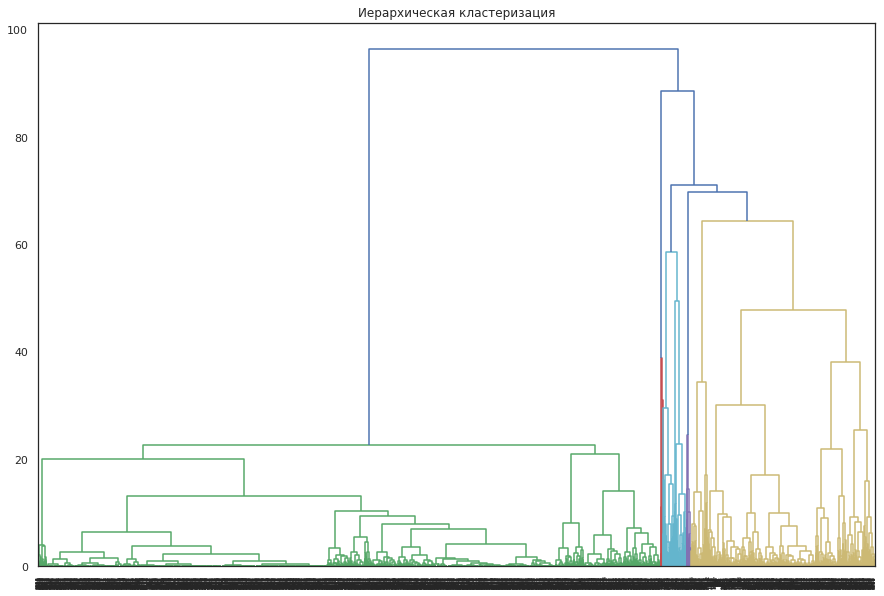

In [57]:
#делаю кластеризацию методом классификации:

sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

In [58]:
#задаю число кластеров и добавляю данные в таблицу:

km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
user_info['cluster_km'] = labels

In [59]:
#Считаю число пользователей в каждом кластере:
user_info['cluster_km'].value_counts()

1    3547
3     593
0      74
2      66
4      12
Name: cluster_km, dtype: int64

Модель разделила на 5 заметных на графике кластера, два из которых еле различимы визуально.

Я также прибегнул к разделению на 5 кластеров. Самый крупный включил в себя 3635 пользователей, самый маленький -- лишь 18. 

In [60]:
#считаю средние значения признаков для кластеров:
cluster_info = user_info.groupby('cluster_km').mean()

cluster_info = cluster_info.drop((['open_contact']), axis=1)
cluster_info = cluster_info.drop((['event_count']), axis=1)

In [110]:
cluster_info

,cluster_km,count_of_sessions,source,lifetime,calls,add_to_favorites,clicks,count,proportion,open_contact,conversion_to_contact,event_count,event_frequency,duration_sum
0,0,19.108108,1.716216,19384.648649,0.121622,7.310811,1.310811,74,1.724138,40,0.540541,9821,132.716216,16755.833333
1,1,1.898788,1.816747,1005.664505,0.041162,0.174796,0.095010,3547,82.642125,674,0.190020,41172,11.607556,66803.333333
2,2,5.257576,1.787879,6123.439394,5.106061,0.333333,0.000000,66,1.537745,66,1.000000,1755,26.590909,2734.833333
3,3,5.858347,1.801012,17836.374368,0.082631,0.382799,0.558179,593,13.816403,188,0.317032,18140,30.590219,30184.366667
4,4,29.083333,1.916667,22481.250000,0.000000,0.500000,4.000000,12,0.279590,12,1.000000,2909,242.416667,6224.133333


### Описание сегментов

**Нулевой кластер** -- в него попало 74 пользователя. Это "старички" с лайфтаймом в почти 2 недели. Лишь 12% из них позвонили контакту из приложения, но зато они чаще других добавляют карточки в избранное -- более 7 раз на пользователя. В среднем они совершили по 19 сессий, и каждый из них хоть раз нажал на предложенное объявление. По предварительной оценке, они -- **наш целевой сегмент**. 

**Первый кластер** -- Самая большая группа. Это новые пользователи, их лайфтайм не превышает одного дня. В среднем число сессий в этой группе не превышает 2, лишь 4% успели позвонить контакту, 17% добавили карточку в избранное и 9% нажали на рекомендацию. 

**Второй кластер** -- Явно знали, зачем пришли. Они совсем не нажимали на рекомендации, в среднем за 5 сессий и 4 дня лайфтайма успели сделать по 5 звонков и лишь треть из них добавили карточки в избранное.

**Третий кластер** --  13% из выборки. За 12 дней лайфтайма сделали почти по 6 сессий. Только 8% звонили из приложения, зато почти 40% добавили карточку товара в избранное, а больше половины -- 56% нажали на рекомендованное объявление. 

**Четвертый кластер** -- Самая малочилсенная группа. 12 пользователей, которые совсем не звонили из приложения. 50% добавили что-то в избранное, зато каждый в среднем по 4 раза кликнул на рекомендацию. Подозрительное поведение и численность группы говорит о том, что это либо рекламные боты, либо наши сотрудники, тестирующие конкретный функционал. 

### Вывод по шагу 3 

Провёл кластеризацию методом классификации. Выделил 5 сегментов пользователей. Привёл описание для каждого сегмента, выделив отличительные черты. 

## Статистический анализ данных

### Анализ Retention rate

Посчитаю и добавлю в таблицу Retention Rate: 

In [61]:
#Создам новый фрейм для удобства расчётов:
user_data = user_info

In [62]:
#Считаю дату первого использования приложения
start_time = event_data.groupby(['id'], as_index=False).agg({'time':'min'})
start_time = start_time.rename(columns={'time':'start_at'})

#Считаю дату последнего использования приложения
stop_time = event_data.groupby(['id'], as_index=False).agg({'time':'max'})
stop_time = stop_time.rename(columns={'time':'stop_at'})

#Привожу данные к нужным типам
start_time['start_at'] = start_time['start_at'].astype('datetime64[W]')
stop_time['stop_at'] = stop_time['stop_at'].astype('datetime64[W]')

In [63]:
#Добавляю данные в табилцу
user_data = user_data.merge(start_time, on='id')
user_data = user_data.merge(stop_time, on='id')

In [64]:
user_data.head(5)

,id,count_of_sessions,source,event_count,lifetime,open_contact,calls,add_to_favorites,clicks,cluster_km,start_at,stop_at
0,020292ab-89bc-4156-9acf-68bc2783f894,1,2,28,18,0,0,0,0,1,2019-10-03,2019-10-03
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,10,1,93,34539,0,0,0,2,3,2019-10-03,2019-10-24
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,5,1,96,33101,2,0,0,3,3,2019-10-03,2019-10-24
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,3,2,8,27997,0,0,0,0,3,2019-10-03,2019-10-24
4,f32e1e2a-3027-4693-b793-b7b3ff274439,1,3,33,40,0,0,0,0,1,2019-10-03,2019-10-03


Посмотрю, как различаются Retention Rate по кластерам: 

In [65]:
#для постороения когорт ищу начальную дату для каждого пользователя:
first_activity_date = event_data.groupby(['id'])['date'].min() 
first_activity_date.name = 'first_activity_date' 
event_data = event_data.join(first_activity_date, on='id')
event_data['first_activity_date'] = pd.to_datetime(event_data['first_activity_date'])

In [66]:
event_data['activity_week'] = event_data['date'].astype('datetime64[W]')

event_data['first_activity_week'] = event_data['first_activity_date'].astype('datetime64[W]')

event_data['lifetime'] = event_data['activity_week'] - event_data['first_activity_week']
event_data['lifetime'] = event_data['lifetime'] / np.timedelta64(1, 'W')
event_data['lifetime'] = event_data['lifetime'].round().astype('int')

cohorts = event_data.groupby(['first_activity_week','lifetime']).agg({'id':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_activity_week','id']]
initial_users_count = initial_users_count.rename(columns={'id':'cohort_users'}) 

cohorts = cohorts.merge(initial_users_count, on='first_activity_week')

cohorts['retention'] = cohorts['id'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='lifetime',values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime('%d.%m')

In [67]:
#смотрю на сводную таблицу RR
retention_pivot

lifetime,0,1,2,3,4
03.10,1.0,0.270567,0.168190,0.109689,0.071298
10.10,1.0,0.233929,0.154464,0.070536,NaN
17.10,1.0,0.240317,0.088908,NaN,NaN
24.10,1.0,0.173570,NaN,NaN,NaN
31.10,1.0,NaN,NaN,NaN,NaN


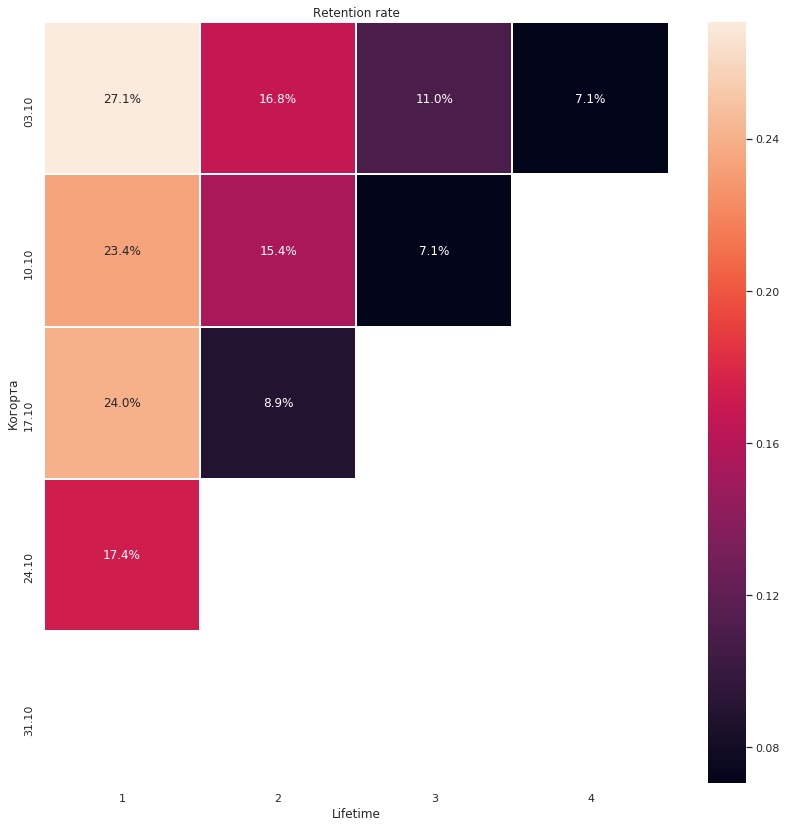

In [68]:
#Строю тепловую карту RR
retention_pivot_heatmap = retention_pivot 
del retention_pivot_heatmap[0] 
plt.figure(figsize=(14, 14))
sns.heatmap(retention_pivot_heatmap, annot=True, fmt='.1%', linewidths=1)
plt.title('Retention rate')
plt.ylabel('Когорта')
plt.xlabel('Lifetime')
plt.show()

In [69]:
#Создаю датафрейм для дальнейшего расчёт RR по кластерам
clusters_and_id = pd.DataFrame()

clusters_and_id['cluster_km'] = user_info['cluster_km']
clusters_and_id['id'] = user_info['id']

#event_data = event_data.join(user_data['cluster_km'], on='id')

In [71]:
#убираю из анализа нашего фродера, чтобы число строк в таблицаз было равно 
df = event_data.query('id != "21230dd9-2f7f-4b77-a436-43d4d10388e0"')

In [72]:
#фиксирую длинну датафрейма, чтобы потом проверить, не потерял ли данные
len(df)

73797

In [73]:
df = df.merge(clusters_and_id, on='id', how='left')

In [74]:
#сверяю длинну после объединения таблиц
df['cluster_km'].value_counts()
len(df['cluster_km'])

73797

In [75]:
df['cluster_km'] = df['cluster_km'].astype('int')

In [76]:
#пишу цикл для построения таблиц RR
for i in range(0,5):
    retention_data = df.query('cluster_km == @i')
    retention_data['activity_week'] = retention_data['date'].astype('datetime64[W]')

    retention_data['first_activity_week'] = retention_data['first_activity_date'].astype('datetime64[W]')

    retention_data['lifetime'] = retention_data['activity_week'] - retention_data['first_activity_week']
    retention_data['lifetime'] = retention_data['lifetime'] / np.timedelta64(1, 'W')
    retention_data['lifetime'] = retention_data['lifetime'].round().astype('int')

    cohorts = retention_data.groupby(['first_activity_week','lifetime']).agg({'id':'nunique'}).reset_index()

    initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_activity_week','id']]
    initial_users_count = initial_users_count.rename(columns={'id':'cohort_users'}) 

    cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
    
    cohorts['retention'] = cohorts['id'] / cohorts['cohort_users']
    retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='lifetime',values='retention',aggfunc='sum')
    retention_pivot.index = retention_pivot.index.strftime('%d.%m')
    print('Таблица RR для кластера:', i)
    display(retention_pivot)

Таблица RR для кластера: 0


lifetime,0,1,2,3,4
03.10,1.0,0.875,0.812500,0.6875,0.4375
10.10,1.0,0.840,0.840000,0.6000,NaN
17.10,1.0,1.000,0.722222,NaN,NaN
24.10,1.0,0.750,NaN,NaN,NaN
31.10,1.0,NaN,NaN,NaN,NaN


Таблица RR для кластера: 1


lifetime,0,1,2
03.10,1.0,0.169620,NaN
10.10,1.0,0.110312,0.002398
17.10,1.0,0.120430,NaN
24.10,1.0,0.114255,NaN
31.10,1.0,NaN,NaN


Таблица RR для кластера: 2


lifetime,0,1,2,3
03.10,1.0,0.166667,0.333333,0.166667
10.10,1.0,0.437500,0.250000,NaN
17.10,1.0,0.565217,0.217391,NaN
24.10,1.0,0.444444,NaN,NaN
31.10,1.0,NaN,NaN,NaN


Таблица RR для кластера: 3


lifetime,0,1,2,3,4
03.10,1.0,0.500000,0.579365,0.357143,0.222222
10.10,1.0,0.573840,0.594937,0.248945,NaN
17.10,1.0,0.792683,0.506098,NaN,NaN
24.10,1.0,0.830769,NaN,NaN,NaN
31.10,1.0,NaN,NaN,NaN,NaN


Таблица RR для кластера: 4


lifetime,0,1,2,3,4
03.10,1.0,0.750000,1.000000,0.750000,1.0
10.10,1.0,0.714286,0.571429,0.571429,NaN
17.10,1.0,NaN,NaN,NaN,NaN


Посчитаю и добавлю в таблицу число пользователей по кластерам:

In [77]:
cluster_count = user_data.groupby('cluster_km', as_index=False).count()[['cluster_km', 'id']].rename(columns={'id': 'count'})

In [78]:
#добавляю данные в таблицу
cluster_info = cluster_info.merge(cluster_count, on='cluster_km')

In [79]:
cluster_info['proportion'] = cluster_info['count'] * 100 / 4292

In [80]:
cluster_info

,cluster_km,count_of_sessions,source,lifetime,calls,add_to_favorites,clicks,count,proportion
0,0,19.108108,1.716216,19384.648649,0.121622,7.310811,1.310811,74,1.724138
1,1,1.898788,1.816747,1005.664505,0.041162,0.174796,0.095010,3547,82.642125
2,2,5.257576,1.787879,6123.439394,5.106061,0.333333,0.000000,66,1.537745
3,3,5.858347,1.801012,17836.374368,0.082631,0.382799,0.558179,593,13.816403
4,4,29.083333,1.916667,22481.250000,0.000000,0.500000,4.000000,12,0.279590


### Считаю конверсию в просмотр контактов

In [81]:
conversion_data = pd.DataFrame() 
conversion_data['open_contact'] = user_data['open_contact'] 
conversion_data['cluster_km'] = user_data['cluster_km']
conversion_data['source'] = user_data['source'] #Это пригодится потом для проверки гипотез
conversion_data['id'] = user_data['id'] #Это пригодится потом для проверки гипотез

In [82]:
conversion_data.loc[conversion_data['open_contact'] > 0, 'open_contact'] = 1
conversion_data.loc[conversion_data['open_contact'] == 0, 'open_contact'] = 0

In [83]:
conversion_data_for_clusters = conversion_data['open_contact'].groupby(conversion_data['cluster_km']).sum()
conversion_data_for_clusters

cluster_km
0     40
1    674
2     66
3    188
4     12
Name: open_contact, dtype: int64

In [85]:
cluster_info = cluster_info.merge(conversion_data_for_clusters, on='cluster_km')

In [86]:
cluster_info['conversion_to_contact'] = cluster_info['open_contact'] / cluster_info['count']

In [87]:
cluster_info.head(5)

,cluster_km,count_of_sessions,source,lifetime,calls,add_to_favorites,clicks,count,proportion,open_contact,conversion_to_contact
0,0,19.108108,1.716216,19384.648649,0.121622,7.310811,1.310811,74,1.724138,40,0.540541
1,1,1.898788,1.816747,1005.664505,0.041162,0.174796,0.095010,3547,82.642125,674,0.190020
2,2,5.257576,1.787879,6123.439394,5.106061,0.333333,0.000000,66,1.537745,66,1.000000
3,3,5.858347,1.801012,17836.374368,0.082631,0.382799,0.558179,593,13.816403,188,0.317032
4,4,29.083333,1.916667,22481.250000,0.000000,0.500000,4.000000,12,0.279590,12,1.000000


### Считаю частоту действий

In [88]:
event_sum = user_info['event_count'].groupby(user_info['cluster_km']).sum()
event_sum.columns = ['cluster_km', 'event_sum']

In [89]:
cluster_info = cluster_info.merge(event_sum, on='cluster_km')

In [90]:
cluster_info['event_frequency'] = cluster_info['event_count'] / cluster_info['count']

In [91]:
cluster_info.head(5)

,cluster_km,count_of_sessions,source,lifetime,calls,add_to_favorites,clicks,count,proportion,open_contact,conversion_to_contact,event_count,event_frequency
0,0,19.108108,1.716216,19384.648649,0.121622,7.310811,1.310811,74,1.724138,40,0.540541,9821,132.716216
1,1,1.898788,1.816747,1005.664505,0.041162,0.174796,0.095010,3547,82.642125,674,0.190020,41172,11.607556
2,2,5.257576,1.787879,6123.439394,5.106061,0.333333,0.000000,66,1.537745,66,1.000000,1755,26.590909
3,3,5.858347,1.801012,17836.374368,0.082631,0.382799,0.558179,593,13.816403,188,0.317032,18140,30.590219
4,4,29.083333,1.916667,22481.250000,0.000000,0.500000,4.000000,12,0.279590,12,1.000000,2909,242.416667


### Считаю время, проведённое в приложении

In [92]:
sessions_per_user = session_info.groupby('id', as_index=False).agg({'duration':'count'})
sessions_per_user = sessions_per_user.rename(columns={'duration':'count_of_sessions'})

In [93]:
duration_per_user = session_info.groupby('id', as_index=False).agg({'duration':'sum'})
duration_per_user = duration_per_user.rename(columns={'duration':'duration_sum'})
#user_info = user_info.merge(duration_per_user, on='id')

In [94]:
user_info = user_info.merge(duration_per_user, on='id')

In [95]:
duration_per_cluster = user_info.groupby('cluster_km', as_index=False).agg({'duration_sum':'sum'})

In [96]:
cluster_info = cluster_info.merge(duration_per_cluster, on='cluster_km')

In [111]:
cluster_info['duration_mean'] = cluster_info['duration_sum'] / cluster_info['count']

In [112]:
cluster_info.head(5)

,cluster_km,count_of_sessions,source,lifetime,calls,add_to_favorites,clicks,count,proportion,open_contact,conversion_to_contact,event_count,event_frequency,duration_sum,duration_mean
0,0,19.108108,1.716216,19384.648649,0.121622,7.310811,1.310811,74,1.724138,40,0.540541,9821,132.716216,16755.833333,226.430180
1,1,1.898788,1.816747,1005.664505,0.041162,0.174796,0.095010,3547,82.642125,674,0.190020,41172,11.607556,66803.333333,18.833756
2,2,5.257576,1.787879,6123.439394,5.106061,0.333333,0.000000,66,1.537745,66,1.000000,1755,26.590909,2734.833333,41.436869
3,3,5.858347,1.801012,17836.374368,0.082631,0.382799,0.558179,593,13.816403,188,0.317032,18140,30.590219,30184.366667,50.901124
4,4,29.083333,1.916667,22481.250000,0.000000,0.500000,4.000000,12,0.279590,12,1.000000,2909,242.416667,6224.133333,518.677778


### Вывод по шагу 4

Процент удержания пользователей в целом хромает: по всем данным он редко превышает 10% к 3 неделе пользования приложением. Это подтверждает ранее полученные выводы о том, что достаточно большая часть пользователей не пользуется нашим сервисом более 2 дней. 

По сегментам самый крупный -- первый, оказывает большее влияние на общую статистику: уже на вторую неделю retention rate по нему сводится к нулю. 

Нулевой держится лучше всех, к четвертой неделе он удерживает 43% пользователей. В этой группе у нас 74 пользователя, и по всей видимости -- **это наш целевой сегмент**, в нём только 1,7% пользователей.

Четвертый, как и говорилось ранее, странные 12 ребят, которые в нулевую и третью недлю совершили одинаковое число сессий, зато были наиболее активны во вторую. Либо боты решили заработать побольше, либо разрабы что-то усиленно тестировали. 

Посчитал и додовил в общую таблицу частоту действий, время, проведённое в приложении и конверсию в целевое действие в среднем по сегментам. 

По конверсии в просмотр контактов выигрывают второй и четвертый сегменты, по времени пользования и частоте действий -- нулевой и четвертый. 

## Проверка гипотез

- Существует ли отличие в конверсии в просмотры контактов у пользователей, пришедших из разных источников? 
- Существует ли отличие в суммарном времени пользования приложением в зависимости от источника? 

### Проверка первой гипотезы

**Гипотеза H₀**: Конверсии в просмомотры у пользователей из разных источников равны;

**Альтернативная гипотеза**: Конверсия в просмотры у пользователей из Яндекса отличается от конверсии пользователей из Гугл.

In [99]:
conversion_data['opent_countact_sum'] = user_info['open_contact']

In [100]:
conversion_data.head(5)

,open_contact,cluster_km,source,id,opent_countact_sum
0,0,1,2,020292ab-89bc-4156-9acf-68bc2783f894,0
1,0,3,1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,0
2,1,3,1,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2
3,0,3,2,d9b06b47-0f36-419b-bbb0-3533e582a6cb,0
4,0,1,3,f32e1e2a-3027-4693-b793-b7b3ff274439,0


In [101]:
yandex_data = conversion_data.query('source == 1')
google_data = conversion_data.query('source == 3')

yandex_conversion = yandex_data['open_contact'].sum() / yandex_data['source'].count()
google_conversion = google_data['open_contact'].sum() / google_data['source'].count()

In [102]:
print(yandex_conversion)
print(google_conversion)

0.24676668391101914
0.24357838795394154


In [103]:
print('Число пользователей из Яндекса:', len(yandex_data))
print('Число пользователей из Яндекса, совершивших целевое действие:', yandex_data['open_contact'].sum())
print()
print('Число пользователей из Гугл:', len(google_data))
print('Число пользователей из Гугл, совершивших целевое действие:', google_data['open_contact'].sum())

Число пользователей из Яндекса: 1933
Число пользователей из Яндекса, совершивших целевое действие: 477

Число пользователей из Гугл: 1129
Число пользователей из Гугл, совершивших целевое действие: 275


In [104]:
alpha = .05 

open_contact_users = np.array([477, 275])
all_users = np.array([1933, 1129])

p1 = open_contact_users[0] / all_users[0]
p2 = open_contact_users[1] / all_users[1]
p_combined = (open_contact_users[0] + open_contact_users[1]) / (all_users[0] + all_users[1])
z_value = (p1 - p2) / mth.sqrt(p_combined * (1 - p_combined) * (1 / all_users[0] + 1 / all_users[1]))
distr = stats.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('z_value =', z_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

z_value = 0.19774668390727942
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Проверка второй гипотезы

**Гипотеза H₀**: Время работы с приложением у пользователей из разных источников равно.

**Альтернативная гипотеза**: Время, проведённое в приложении, у пользователей из Яндекса отличается от времени пользователей из Гугл.

In [105]:
user_info.head(5)

,id,count_of_sessions,source,event_count,lifetime,open_contact,calls,add_to_favorites,clicks,cluster_km,duration_sum
0,020292ab-89bc-4156-9acf-68bc2783f894,1,2,28,18,0,0,0,0,1,18.700000
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,10,1,93,34539,0,0,0,2,3,154.016667
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,5,1,96,33101,2,0,0,3,3,132.316667
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,3,2,8,27997,0,0,0,0,3,2.483333
4,f32e1e2a-3027-4693-b793-b7b3ff274439,1,3,33,40,0,0,0,0,1,40.800000


In [106]:
yandex_time = user_info[user_info['source']== 1].groupby('id', as_index=False).agg({'duration_sum' : 'sum'})
yandex_time.columns = ['id', 'duration']
 
google_time = user_info[user_info['source']== 2].groupby('id', as_index=False).agg({'duration_sum' : 'sum'})
google_time.columns = ['id', 'duration']

yandex_time['duration'] = yandex_time['duration'].astype('int')
google_time['duration'] = google_time['duration'].astype('int')

In [107]:
sampleA = yandex_time['duration']
sampleB = google_time['duration']

In [108]:
print(sampleA.mean())
print(sampleB.mean())

29.29022245214692
24.802439024390242


In [109]:
from scipy.stats import mannwhitneyu
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.00000
-0.153


P-value меньше 0.5, значит нулевую гипотезу отвергаем. 

### Вывод по шагу 5

Проверил 2 гипотезы: о разности конверсии в просмотры контактов среди пользователей, пришедших из разных источников, и о разности времени, проведённом в приложении, также среди этих групп. 

Первую не получилось отвергунть, есть основания считать доли равными. 
Вторую получилось отвергнуть, есть основания считать, что время пользования приложением зависит от источника. 

## Выводы по анализу 

- Всего имеем данные о 4293 пользователях, которые совершили 12432 сессии, выполнив 74197 действий в приложении.

- **Больше всего клиентов** к нам пришло **из Яндекса** -- 1934, меньше всего из Google -- 1129. 

- Нашел одного бота-фродера, который только и делал, что отсматривал рекламу в приложении, воруя бюджеты пользователей. Выгнал его его из данных.

- **Средний lifetime** составляет **2,5 дня** -- по-видимому, **пользователи редко возвращаются в приложение**.

- Целевое действие -- переход в контакт, совершил 981 пользователь, а средняя конверсия в это дейсвтие составила 32%. 

**Сегментировал пользователей на 5 кластеров:** 

   **Нулевой кластер** -- в него попало 74 пользователя. Это "старички" с лайфтаймом в почти 2 недели. Лишь 12% из них позвонили контакту из приложения, но зато они чаще других добавляют карточки в избранное -- более 7 раз на пользователя. В среднем они совершили по 19 сессий, и каждый из них хоть раз нажал на предложенное объявление. По предварительной оценке, они -- **наш целевой сегмент**. 

   **Первый кластер** -- Самая большая группа. Это новые пользователи, их лайфтайм не превышает одного дня. В среднем число сессий в этой группе не превышает 2, лишь 4% успели позвонить контакту, 17% добавили карточку в избранное и 9% нажали на рекомендацию. 

   **Второй кластер** -- Явно знали, зачем пришли. Они совсем не нажимали на рекомендации, в среднем за 5 сессий и 4 дня лайфтайма успели сделать по 5 звонков и лишь треть из них добавили карточки в избранное.

   **Третий кластер** --  13% из выборки. За 12 дней лайфтайма сделали почти по 6 сессий. Только 8% звонили из приложения, зато почти 40% добавили карточку товара в избранное, а больше половины -- 56% нажали на рекомендованное объявление. 

   **Четвертый кластер** -- Самая малочилсенная группа. 12 пользователей, которые совсем не звонили из приложения. 50% добавили что-то в избранное, зато каждый в среднем по 4 раза кликнул на рекомендацию. Подозрительное поведение и численность группы говорит о том, что это либо рекламные боты, либо наши сотрудники, тестирующие конкретный функционал. 

Retention rate нулевого кластера положительно выделяется на общем фоне -- к 4 неделе 43% из них еще пользуются приложением. В целом по всей выборке этот показатель стремится к 7%.

Четвертый кластер -- 12 сомнительных ребят. Они очень активные, кажется, это наши сотрудники. 

**Проверка гипотез** показала, что **нельзя отвергнуть предположения** об отсутствии статистической разницы между конверсиями в просмотр контактов в зависимости от источника, из которого пришёл пользователь. Проверка второй гипотезы показала, что  между источником прихода пользователя и временем, проведённым в приложении, есть статистическая разница. Пользователи, пришедшие из Яндекса, в среднем проводят в приложении на 5 минут больше.

## Предложения 

Наши самые активные пользователи -- нулевой сегмент. Они показывают хорошую конверсию в целевое действие -- 54%. При этом показывая отличные покахатели в других метриках: кликах по рекомендациям, звонкам и сохранением в избранное. Также у них лучшие показатели retention rate -- 43% остаются к 4 неделе. 

Чтобы привести других пользователей к показателям второго кластера, предлагаю: 

- **Провести анализ рекламы, размещаемой во всех источниках.** Большая часть пользователей не задерживается надолго -- 3,5 тысячи пользователей из первого сегмента не проводя в приложении и 20 минут. Их Lifetime не превышает 1.2 дня. Возможно, приложение не отвечает их ожиданиям, возникшим из-за неправильной рекламы. 


- **Стимулировать пользователей заходить в приложение чаще**. Например, давать баллы за ежедневное посещение приложения. 


- **Совершенствовать персонализацию отображаемых объявлений**. Чтобы пользователь "цеплялся", заходя в приложение. 2 сессии по 8-10 минут у большинства пользователей говорят о том, что они не находят ничего интересного для себя, из-за чего больше не заходят в приложение. Кажется, "Ненужные вещи" им действительно не нужны. 

## Материалы

[Презентация](https://disk.yandex.ru/i/l79J8YzAh-igkw)